In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
pip install pycaret

In [ ]:
from pycaret.regression import *

In [ ]:
china  = pd.read_csv('Data_with_exchange_ch.csv')
mexico = pd.read_csv('Data_with_exchange_mx.csv')
rate = pd.read_csv('Data.csv')

In [ ]:
rate['DATE']  = pd.to_datetime(rate['DATE'])
china['DATE']  = pd.to_datetime(china['DATE'])
mexico['DATE'] = pd.to_datetime(mexico['DATE'])

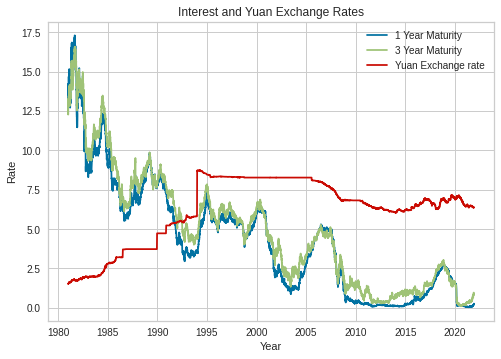

In [ ]:
fig, ax = plt.subplots()
ax.plot(china['DATE'],china['1yr_rate'],label='1 Year Maturity')
ax.plot(china['DATE'],china['3yr_rate'],label='3 Year Maturity')
ax.plot(china['DATE'],china['ex_ch'],label='Yuan Exchange rate')
ax.set_ylabel('Rate')
ax.set_xlabel('Year')
ax.set_title('Interest and Yuan Exchange Rates')
ax.legend(loc = 'best')
plt.show()

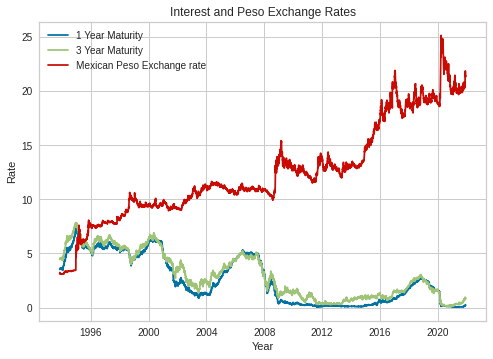

In [ ]:
fig, ax = plt.subplots()
ax.plot(mexico['DATE'],mexico['1yr_rate'],label='1 Year Maturity')
ax.plot(mexico['DATE'],mexico['3yr_rate'],label='3 Year Maturity')
ax.plot(mexico['DATE'],mexico['ex_mx'],label='Mexican Peso Exchange rate')
ax.set_ylabel('Rate')
ax.set_xlabel('Year')
ax.set_title('Interest and Peso Exchange Rates')
ax.legend(loc = 'best')
plt.show()

###Gradiant Boosting for Rates

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rate,test_size= 0.3,random_state= 42)

In [ ]:
set_rate = setup(data= train, test_data= test, target= '3yr_rate', fold_strategy= 'timeseries', numeric_features=['series','month','1yr_rate'],
                 transform_target= True, session_id= 123)

,Description,Value
0,session_id,123
1,Target,3yr_rate
2,Original Data,"(10474, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10474, 22)"


In [ ]:
gb_rate = create_model( 'gbr' , fold= 5, max_depth=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1128,0.0252,0.1587,0.9978,0.0301,0.0343
1,0.1052,0.0196,0.1401,0.9981,0.0286,0.0332
2,0.1072,0.0213,0.1460,0.9981,0.0286,0.0325
3,0.0989,0.0173,0.1317,0.9984,0.0288,0.0337
4,0.1037,0.0190,0.1378,0.9983,0.0277,0.0317
Mean,0.1056,0.0205,0.1429,0.9982,0.0287,0.0331
SD,0.0045,0.0027,0.0092,0.0002,0.0008,0.0009


In [ ]:
#save_model(gb_rate,'gb_rates')

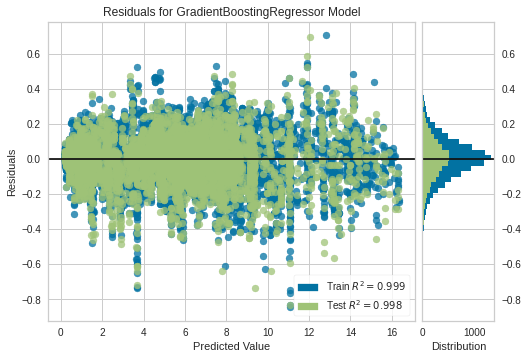

In [ ]:
plot_model(gb_rate,'residuals')

In [ ]:
plot_model(gb_rate,'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,4
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


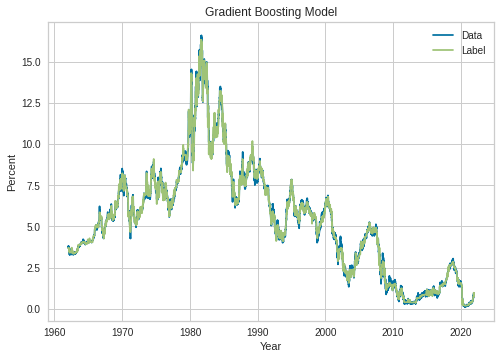

In [ ]:
predictions_rates = predict_model(gb_rate, data=rate)
fig, ax = plt.subplots()
ax.plot(predictions_rates['DATE'],predictions_rates['3yr_rate'],label='Data')
ax.plot(predictions_rates['DATE'],predictions_rates['Label'],label='Label')
ax.set_ylabel('Percent')
ax.set_xlabel('Year')
ax.set_title('Gradient Boosting Model')
ax.legend(loc = 'best')
plt.show()

###Gradient Boosting for china

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(china,test_size= 0.3,random_state= 42)

In [ ]:
set_ch = setup(data= train, test_data= test, target= 'ex_ch', fold_strategy= 'timeseries', numeric_features=['new_series','month','1yr_rate'],
                 transform_target= True, session_id= 123)

,Description,Value
0,session_id,123
1,Target,ex_ch
2,Original Data,"(7113, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7113, 23)"


In [ ]:
gb_ch = create_model( 'gbr' , fold= 5, max_depth=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0372,0.0047,0.0684,0.9990,0.0142,0.0083
1,0.0323,0.0030,0.0547,0.9993,0.0096,0.0064
2,0.0335,0.0040,0.0630,0.9990,0.0119,0.0069
3,0.0347,0.0029,0.0543,0.9993,0.0106,0.0078
4,0.0312,0.0023,0.0484,0.9994,0.0095,0.0069
Mean,0.0338,0.0034,0.0578,0.9992,0.0111,0.0073
SD,0.0021,0.0008,0.0071,0.0002,0.0018,0.0007


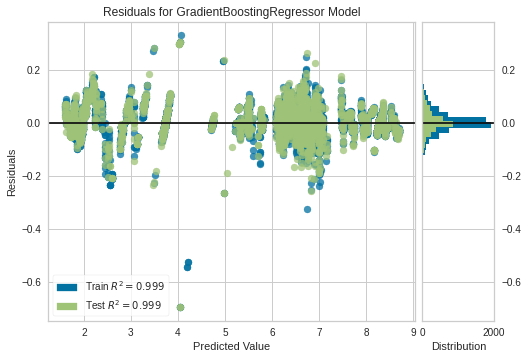

In [ ]:
plot_model(gb_ch,'residuals')

In [ ]:
plot_model(gb_ch,'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,4
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


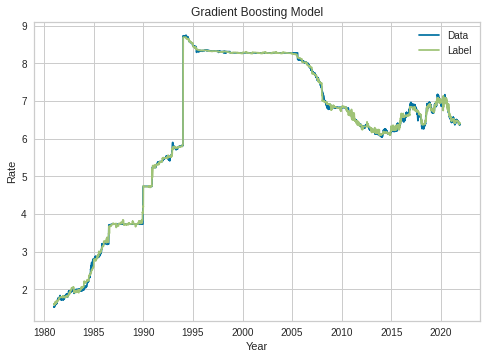

In [ ]:
predictions_rates = predict_model(gb_ch, data=china)
fig, ax = plt.subplots()
ax.plot(predictions_rates['DATE'],predictions_rates['ex_ch'],label='Data')
ax.plot(predictions_rates['DATE'],predictions_rates['Label'],label='Label')
ax.set_ylabel('Rate')
ax.set_xlabel('Year')
ax.set_title('Gradient Boosting Model')
ax.legend(loc = 'best')
plt.show()

###Gradient Boosting for mexico

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mexico,test_size= 0.3,random_state= 42)

In [ ]:
set_mx = setup(data= train, test_data= test, target= 'ex_mx', fold_strategy= 'timeseries', numeric_features=['new_series','month','1yr_rate'],
                 transform_target= True, session_id= 123)

,Description,Value
0,session_id,123
1,Target,ex_mx
2,Original Data,"(4906, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4906, 22)"


In [ ]:
gb_mx = create_model( 'gbr' , fold= 5, max_depth=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0092,2.7163,1.6481,0.8586,0.1278,0.0924
1,1.0601,3.1196,1.7662,0.8503,0.1240,0.0904
2,0.8931,2.1654,1.4715,0.8936,0.1058,0.0783
3,0.8572,1.8377,1.3556,0.9075,0.1020,0.0766
4,0.7987,1.6538,1.2860,0.9144,0.0942,0.0695
Mean,0.9237,2.2985,1.5055,0.8849,0.1108,0.0814
SD,0.0969,0.5467,0.1790,0.0259,0.0130,0.0087


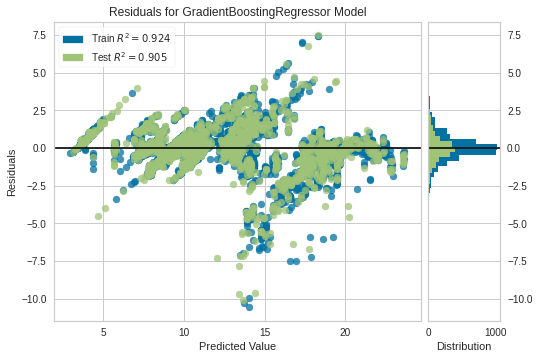

In [ ]:
plot_model(gb_mx,'residuals')

In [ ]:
plot_model(gb_mx,'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,4
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


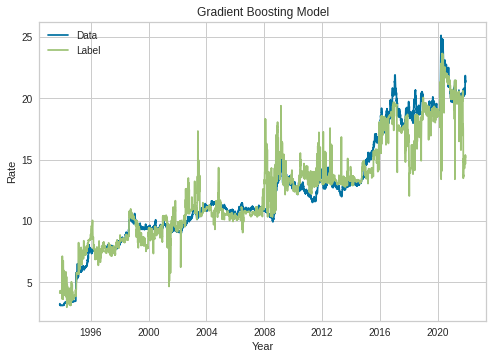

In [ ]:
predictions_rates = predict_model(gb_mx, data=mexico)
fig, ax = plt.subplots()
ax.plot(predictions_rates['DATE'],predictions_rates['ex_mx'],label='Data')
ax.plot(predictions_rates['DATE'],predictions_rates['Label'],label='Label')
ax.set_ylabel('Rate')
ax.set_xlabel('Year')
ax.set_title('Gradient Boosting Model')
ax.legend(loc = 'best')
plt.show()